## Normal equation으로 구하는 Linear regression

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 로딩

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X = df.values
y = boston.target

#### 모델
* fit_intercept : 상수항을 넣을 것인가? 말것인가?
* normalize : 스케일링
* copy_X : x 값을 복사해서 사용
* n_jobs : 몇 개의 cpu를 사용할 것인가?

In [7]:
from sklearn.linear_model import  LinearRegression
lr_ne = LinearRegression(fit_intercept=True)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
lr_ne.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [11]:
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse

4.5549032218378525

In [40]:
lr_ne.intercept_ #(상수항)

33.388062189324316

In [41]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.988940550315267

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

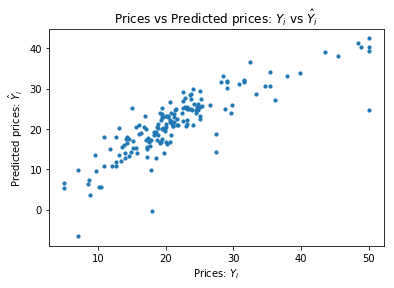

In [13]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [14]:
lr_ne.coef_  # 계수

array([-1.28060398e-01,  3.77955693e-02,  5.86107797e-02,  3.24007007e+00,
       -1.62222676e+01,  3.89352244e+00, -1.27879944e-02, -1.42326864e+00,
        2.34513082e-01, -8.20261127e-03, -9.29950535e-01,  1.19151410e-02,
       -5.48489997e-01])

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## SGD로 구하는 Linear Regression 
* loss : 로스함수를 무엇으로 할것이냐
* penalty : l1,l2
* alpha : lambda
* l1_ratio : l1과 l2 얼마정도 섞을거냐
* fit_intercept : 절편을 넣을 것이냐 말것이냐
* max_iter : epoch
* tor : loss 값이 얼마 이상이면 멈춘다. 즉 어느 시점에서 멈추게 하는 것
* shuffle : 데이터를 섞을 것인지, 말 것인지


In [16]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [19]:
lr_SGD.fit(X_train, y_train)

C:\Users\maerad7\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [20]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [21]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(139339167995566.42, 1.941540373769668e+28)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

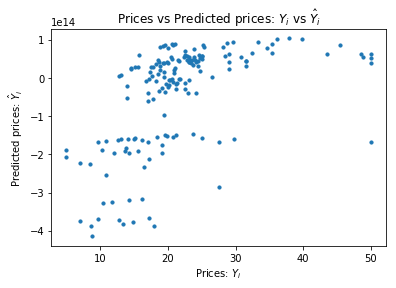

In [22]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.33, random_state=42)

In [24]:
lr_SGD.fit(X_train, y_train)

C:\Users\maerad7\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [25]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [26]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.813553679150038, 23.17029902205887)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

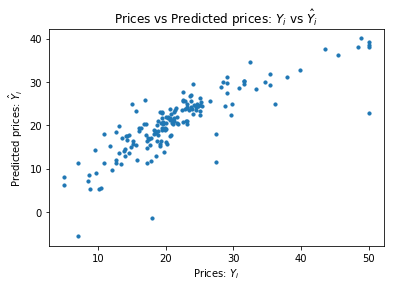

In [27]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

## Ridge & Lasso regression 
* Ridge
* alpha : lambda
* sover : Normal equation으로 구하느냐 SGD로 구하느냐

In [28]:
from sklearn.linear_model import Lasso, Ridge


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [30]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)
#lasso = Lasso(fit_intercept=True, alpha=0.5)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
rmse, mse

(4.581368851153034, 20.988940550315267)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

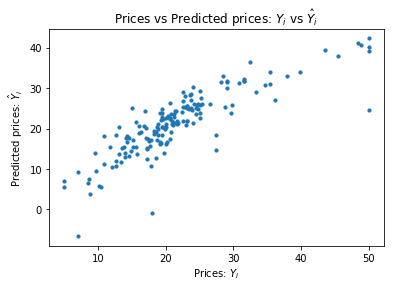

In [32]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [33]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    p = ridge.predict(X_test)
    err = p-y_test
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5554		 5.8806
0.418	 4.5773		 5.8467
0.826	 4.5957		 5.8319
1.234	 4.6097		 5.8234
1.642	 4.6203		 5.8175
2.050	 4.6284		 5.8126
2.458	 4.6349		 5.8082
2.866	 4.6402		 5.8041
3.274	 4.6445		 5.8000
3.682	 4.6481		 5.7960
4.090	 4.6512		 5.7920
4.498	 4.6538		 5.7880
4.906	 4.6562		 5.7840
5.313	 4.6582		 5.7800
5.721	 4.6600		 5.7760
6.129	 4.6616		 5.7720
6.537	 4.6631		 5.7680
6.945	 4.6644		 5.7641
7.353	 4.6657		 5.7602
7.761	 4.6668		 5.7563
8.169	 4.6679		 5.7524
8.577	 4.6689		 5.7485
8.985	 4.6698		 5.7447
9.393	 4.6707		 5.7410
9.801	 4.6716		 5.7372
10.209	 4.6724		 5.7335
10.617	 4.6732		 5.7298
11.025	 4.6739		 5.7262
11.433	 4.6747		 5.7226
11.841	 4.6754		 5.7190
12.249	 4.6761		 5.7155
12.657	 4.6768		 5.7120
13.065	 4.6774		 5.7086
13.473	 4.6781		 5.7052
13.881	 4.6787		 5.7018
14.289	 4.6793		 5.6985
14.697	 4.6799		 5.6952
15.104	 4.6806		 5.6919
15.512	 4.6812		 5.6887
15.920	 4.6818		 5.6856
16.328	 4.6824		 5

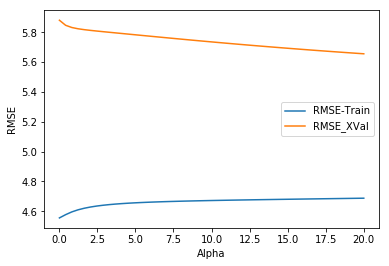

In [34]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

In [35]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)


Method: linear regression
RMSE on training: 4.5549
RMSE on 10-fold CV: 5.8819
Method: lasso
RMSE on training: 4.7270
RMSE on 10-fold CV: 5.7675
Method: ridge
RMSE on training: 4.5710
RMSE on 10-fold CV: 5.8535
